# Housing Price Prediction

In [24]:
#Import required Modules
import numpy as np
import pandas as pd
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings('ignore')

print('Modules imported successfully!')

Modules imported successfully!


In [2]:
#Import Datasets
df_bangalore = pd.read_csv(r'datasets/Bangalore.csv')
df_chennai = pd.read_csv(r'datasets/Chennai.csv')
df_delhi = pd.read_csv(r'datasets/Delhi.csv')
df_hyderabad = pd.read_csv(r'datasets/Hyderabad.csv')
df_kolkata = pd.read_csv(r'datasets/Kolkata.csv')
df_mumbai = pd.read_csv(r'datasets/Mumbai.csv')

In [3]:
#Creating a new column to keep track of city
df_bangalore['City'] = 'Bangalore'
df_chennai['City'] = 'Chennai'
df_delhi['City'] = 'Delhi'
df_hyderabad['City'] = 'Hyderabad'
df_kolkata['City'] = 'Kolkata'
df_mumbai['City'] = ' Mumbai'

In [4]:
#Merge Dataset
df = pd.concat([df_bangalore, df_chennai, df_delhi, df_hyderabad, df_kolkata, df_mumbai])

print('Dataset Loaded Successfully!')

Dataset Loaded Successfully!


In [5]:
#Check the size of the dataset
df.shape

(32963, 41)

In [6]:
#Check the names of the columns
df.columns

Index(['Price', 'Area', 'Location', 'No. of Bedrooms', 'Resale',
       'MaintenanceStaff', 'Gymnasium', 'SwimmingPool', 'LandscapedGardens',
       'JoggingTrack', 'RainWaterHarvesting', 'IndoorGames', 'ShoppingMall',
       'Intercom', 'SportsFacility', 'ATM', 'ClubHouse', 'School',
       '24X7Security', 'PowerBackup', 'CarParking', 'StaffQuarter',
       'Cafeteria', 'MultipurposeRoom', 'Hospital', 'WashingMachine',
       'Gasconnection', 'AC', 'Wifi', 'Children'splayarea', 'LiftAvailable',
       'BED', 'VaastuCompliant', 'Microwave', 'GolfCourse', 'TV',
       'DiningTable', 'Sofa', 'Wardrobe', 'Refrigerator', 'City'],
      dtype='object')

In [7]:
#Check the first 5 rows
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2,0,0,1,1,1,1,...,0,1,0,0,0,0,0,0,0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2,0,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore
3,8358000,1675,Doddanekundi,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Bangalore
4,6845000,1670,Kengeri,3,0,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,Bangalore


In [8]:
#Checking th data types of the features
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32963 entries, 0 to 7718
Data columns (total 41 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Price                32963 non-null  int64 
 1   Area                 32963 non-null  int64 
 2   Location             32963 non-null  object
 3   No. of Bedrooms      32963 non-null  int64 
 4   Resale               32963 non-null  int64 
 5   MaintenanceStaff     32963 non-null  int64 
 6   Gymnasium            32963 non-null  int64 
 7   SwimmingPool         32963 non-null  int64 
 8   LandscapedGardens    32963 non-null  int64 
 9   JoggingTrack         32963 non-null  int64 
 10  RainWaterHarvesting  32963 non-null  int64 
 11  IndoorGames          32963 non-null  int64 
 12  ShoppingMall         32963 non-null  int64 
 13  Intercom             32963 non-null  int64 
 14  SportsFacility       32963 non-null  int64 
 15  ATM                  32963 non-null  int64 
 16  ClubH

In [9]:
#Checking unique values in each column
df.apply(lambda x: len(x.unique()))

Price                  4924
Area                   2452
Location               1776
No. of Bedrooms           9
Resale                    2
MaintenanceStaff          3
Gymnasium                 3
SwimmingPool              3
LandscapedGardens         3
JoggingTrack              3
RainWaterHarvesting       3
IndoorGames               3
ShoppingMall              3
Intercom                  3
SportsFacility            3
ATM                       3
ClubHouse                 3
School                    3
24X7Security              3
PowerBackup               3
CarParking                3
StaffQuarter              3
Cafeteria                 3
MultipurposeRoom          3
Hospital                  3
WashingMachine            3
Gasconnection             3
AC                        3
Wifi                      3
Children'splayarea        3
LiftAvailable             3
BED                       3
VaastuCompliant           3
Microwave                 3
GolfCourse                3
TV                  

In [10]:
#Replacing 9 with Null values
df.replace(9, np.nan, inplace=True)

In [11]:
#Checking the null values 
df.isnull().sum()

Price                      0
Area                       0
Location                   0
No. of Bedrooms            1
Resale                     0
MaintenanceStaff       22870
Gymnasium              22870
SwimmingPool           22870
LandscapedGardens      22870
JoggingTrack           22870
RainWaterHarvesting    22870
IndoorGames            22870
ShoppingMall           22870
Intercom               22870
SportsFacility         22870
ATM                    22870
ClubHouse              22870
School                 22870
24X7Security           22870
PowerBackup            22870
CarParking             22870
StaffQuarter           22870
Cafeteria              22870
MultipurposeRoom       22870
Hospital               22870
WashingMachine         22870
Gasconnection          22870
AC                     22870
Wifi                   22870
Children'splayarea     22870
LiftAvailable          22870
BED                    22870
VaastuCompliant        22870
Microwave              22870
GolfCourse    

In [12]:
#Drop null values
df.dropna(inplace=True)

In [13]:
#Checking for duplicate rows
df.duplicated().sum()

1867

In [14]:
#Removing the duplicate rows
df.drop_duplicates(inplace=True)

In [15]:
#Checking the dataset before moving to EDA
df.head()

,Price,Area,Location,No. of Bedrooms,Resale,MaintenanceStaff,Gymnasium,SwimmingPool,LandscapedGardens,JoggingTrack,...,BED,VaastuCompliant,Microwave,GolfCourse,TV,DiningTable,Sofa,Wardrobe,Refrigerator,City
0,30000000,3340,JP Nagar Phase 1,4.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
1,7888000,1045,Dasarahalli on Tumkur Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
2,4866000,1179,Kannur on Thanisandra Main Road,2.0,0,0.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
3,8358000,1675,Doddanekundi,3.0,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore
4,6845000,1670,Kengeri,3.0,0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Bangalore


## Exploratory Data Anlaysis

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='count'>

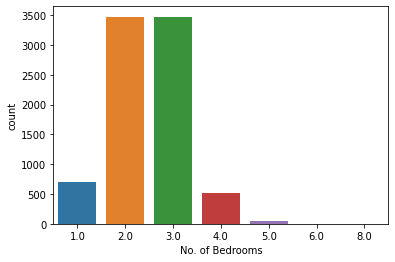

In [32]:
sns.countplot(df['No. of Bedrooms'])

<AxesSubplot:xlabel='No. of Bedrooms', ylabel='Price'>

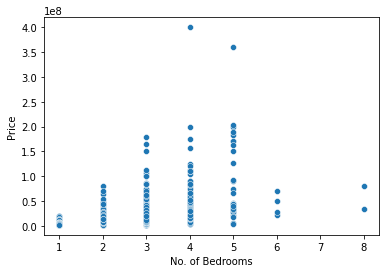

In [33]:
sns.scatterplot(x = df['No. of Bedrooms'], y=df['Price'])

## Preprocessing

In [16]:
#Splitting the data
X = df.drop(columns='Price')
y = df['Price']

In [17]:
#Splitting the data into train and test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [18]:
#Required modules for the pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [19]:
#Taking numerical and categorical features in seperate variables
numeric_features = ['Area']

categorical_features = ['Location', 'City']

In [20]:
#Pipeline for transformation
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder())
])

In [21]:
#Pipeline for column transformation
preprocessor = ColumnTransformer(transformers=[
    ('numeric', numeric_transformer, numeric_features),
    ('categorical', categorical_transformer, categorical_features)
])

In [22]:
#Function to train and get the score of the models
def oneForAll(preprocessor, models, name):
    n=0
    for model in models:
        pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        (name[n], model)
        ])
        pipeline.fit(X,y)
        y_pred_train = pipeline.predict(X_train)
        y_pred_test = pipeline.predict(X_test)
        scores_train.append(r2_score(y_train, y_pred_train))
        scores_test.append(r2_score(y_test, y_pred_test))
        n=n+1

In [23]:
#Required modules for models
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xgb
import lightgbm as gbm

In [24]:
#initialising the models
linear = LinearRegression()
ridge = Ridge()
lasso = Lasso()
elastic = ElasticNet()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
knn = KNeighborsRegressor()
xg = xgb.XGBRegressor()
lgb = gbm.LGBMRegressor()

In [25]:
#final preparation for fitting
from sklearn.metrics import r2_score
models = [linear, ridge, lasso, elastic, dt, rf, knn, xg, lgb]
name = ['Linear Regression', 'Ridge', 'Lasso', 'Elastic', 'Decision Tree', 'Random Forest', 'K-Neighbors', 'XGBoost', 'Light GBM']
scores_train=[]
scores_test=[]

In [26]:
#Calling the function
oneForAll(preprocessor, models, name)

## Evaluation

In [27]:
#Models and scores  on train and test
models = pd.DataFrame({
    'Model': name,
    'Train Score': scores_train,
    'Test Score': scores_test})

models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
4,Decision Tree,0.989278,0.984668
7,XGBoost,0.965199,0.968971
5,Random Forest,0.941726,0.928747
8,Light GBM,0.798078,0.754256
6,K-Neighbors,0.767101,0.720602
1,Ridge,0.544120,0.377250
2,Lasso,0.544124,0.377242
0,Linear Regression,0.544124,0.377242
3,Elastic,0.473242,0.345401
